In [4]:
pip install --upgrade plotly

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews (1).csv


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time as t
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
import datetime as d

In [7]:

Reviews = pd.read_csv("Reviews.csv")
Reviews

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
count = Reviews.isna().sum()
count

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#Data visualisation

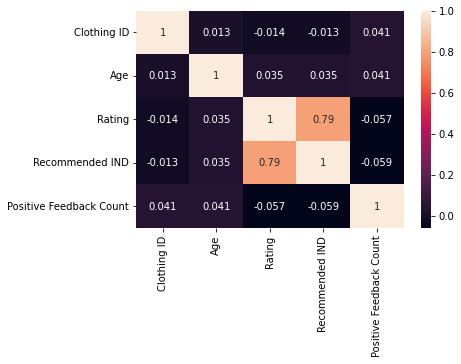

In [9]:
sns.heatmap(Reviews.corr(),annot = True)

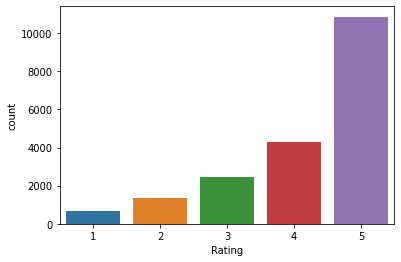

In [10]:
#Distribution of ratings
sns.countplot(data = Reviews , x = 'Rating')

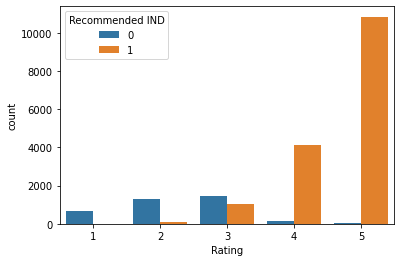

In [11]:
# rating and recommendation
sns.countplot(x=Reviews['Rating'],hue = Reviews['Recommended IND'])


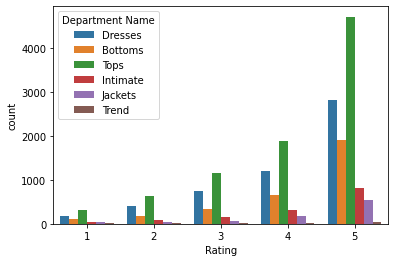

In [12]:
sns.countplot(x=Reviews['Rating'],hue = Reviews['Department Name'])

In [14]:
FreqOfWords = Reviews['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [34]:
FreqOfWords = Reviews['Lemma'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

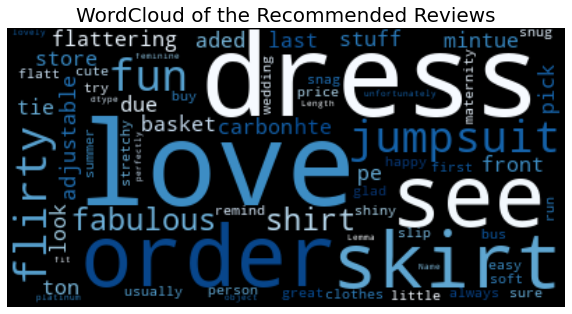

In [32]:
from wordcloud import WordCloud
data_recommended =Reviews[Reviews['Recommended IND'] == 1]  
data_not_recommended = Reviews[Reviews['Recommended IND'] == 0] 

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True,colormap='Blues').generate(str((data_recommended['Lemma'])))

plt.figure(figsize=(10, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

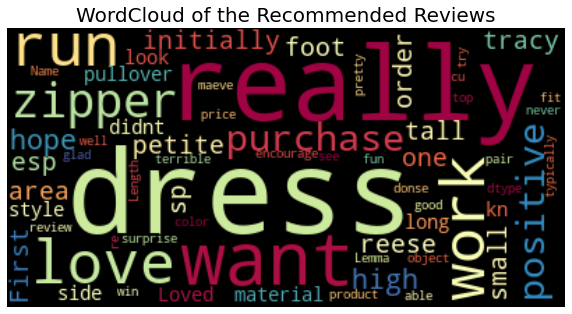

In [33]:
WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True,colormap='Spectral').generate(str((data_not_recommended['Lemma'])))

plt.figure(figsize=(10, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [16]:

px.scatter(Reviews, x="Age", y="Positive Feedback Count", facet_row="Recommended IND", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



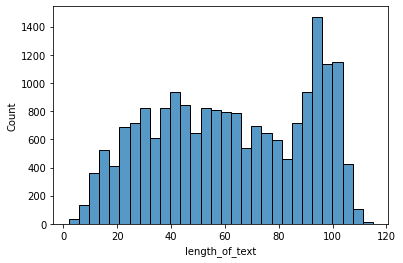

In [13]:
Reviews['length_of_text'] = [len(i.split(' ')) for i in Reviews['Review Text']]
sns.histplot(Reviews['length_of_text'])

In [17]:
px.box(Reviews, x="Age", y="Division Name", orientation="h",color = 'Recommended IND')

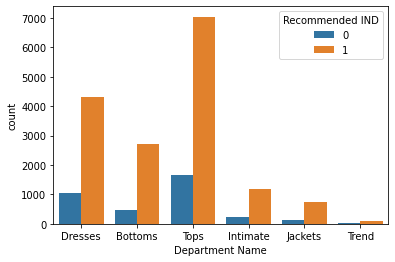

In [18]:
sns.countplot(x=Reviews['Department Name'],hue = Reviews['Recommended IND'])

In [19]:
Reviews['length_of_text'] = [len(i.split(' ')) for i in Reviews['Review Text']]
fig = px.histogram(Reviews['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended'},
                   color=Reviews['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

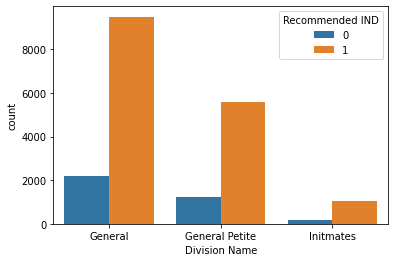

In [45]:
sns.countplot(x=Reviews['Division Name'],hue = Reviews['Recommended IND'])

In [23]:
px.histogram(Reviews,x='Age')

In [22]:
px.histogram(Reviews, x= 'Class Name')

# preprocessing

In [24]:

# cleaning the text 

import re
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ', text)
  return text

Reviews['Cleaned Reviews'] = Reviews['Review Text'].apply(clean)
Reviews.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length_of_text,Cleaned Reviews
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,I had such high hopes for this dress and reall...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,I love love love this jumpsuit it s fun flirty...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,This shirt is very flattering to all due to th...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,I love tracy reese dresses but this one is not...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,101,I aded this in my basket at hte last mintue to...


In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
# tokenization

import nltk
from nltk.tokenize import word_tokenize

def Word_tokenize(text):
  return word_tokenize(text)

Reviews['token Reviews'] = Reviews['Cleaned Reviews'].apply(Word_tokenize)

Reviews.head()



,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length_of_text,Cleaned Reviews,token Reviews
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,I love love love this jumpsuit it s fun flirty...,"[I, love, love, love, this, jumpsuit, it, s, f..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, but, this, on..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,101,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import pos_tag


pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
      if word.lower() not in set(stopwords.words('english')):
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Reviews['POS tagged'] = Reviews['Cleaned Reviews'].apply(token_stop_pos)
Reviews.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length_of_text,Cleaned Reviews,token Reviews,POS tagged
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ...","[(high, a), (hopes, n), (dress, n), (really, r..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,I love love love this jumpsuit it s fun flirty...,"[I, love, love, love, this, jumpsuit, it, s, f...","[(love, v), (love, r), (love, v), (jumpsuit, n..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d...","[(shirt, n), (flattering, a), (due, a), (adjus..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, but, this, on...","[(love, v), (tracy, n), (reese, a), (dresses, ..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,101,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,...","[(aded, v), (basket, n), (hte, n), (last, a), ..."


In [30]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

Reviews['Lemma'] = Reviews['POS tagged'].apply(lemmatize)
Reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length_of_text,Cleaned Reviews,token Reviews,POS tagged,Lemma
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ...","[(high, a), (hopes, n), (dress, n), (really, r...",high hope dress really want work initially o...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,I love love love this jumpsuit it s fun flirty...,"[I, love, love, love, this, jumpsuit, it, s, f...","[(love, v), (love, r), (love, v), (jumpsuit, n...",love love love jumpsuit fun flirty fabulous ...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d...","[(shirt, n), (flattering, a), (due, a), (adjus...",shirt flattering due adjustable front tie pe...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, but, this, on...","[(love, v), (tracy, n), (reese, a), (dresses, ...",love tracy reese dress one petite foot tall ...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,101,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,...","[(aded, v), (basket, n), (hte, n), (last, a), ...",aded basket hte last mintue see would look l...


In [31]:
def sentiment(i):
  if i == 3:
    return 'Neutral'
  elif i<3:
    return 'Negative'
  else:
    return 'Positive'

Reviews['Sentiment'] = Reviews['Rating'].apply(sentiment)
Reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length_of_text,Cleaned Reviews,token Reviews,POS tagged,Lemma,Sentiment
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ...","[(high, a), (hopes, n), (dress, n), (really, r...",high hope dress really want work initially o...,Neutral
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,I love love love this jumpsuit it s fun flirty...,"[I, love, love, love, this, jumpsuit, it, s, f...","[(love, v), (love, r), (love, v), (jumpsuit, n...",love love love jumpsuit fun flirty fabulous ...,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d...","[(shirt, n), (flattering, a), (due, a), (adjus...",shirt flattering due adjustable front tie pe...,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, but, this, on...","[(love, v), (tracy, n), (reese, a), (dresses, ...",love tracy reese dress one petite foot tall ...,Negative
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,101,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,...","[(aded, v), (basket, n), (hte, n), (last, a), ...",aded basket hte last mintue see would look l...,Positive


#Classifiers

In [35]:

vectorizer = CountVectorizer()

train_data,test_data = train_test_split(Reviews,test_size=0.3)

X_train = vectorizer.fit_transform(train_data["Review Text"].fillna(' '))

y_train = train_data['Sentiment']

X_test = vectorizer.transform(test_data["Review Text"].fillna(' '))

y_test = test_data['Sentiment']

In [36]:
#MLP
start=d.datetime.now()
nn = MLPClassifier(alpha=0.002,solver='lbfgs',random_state=1,learning_rate_init=0.25)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:01:24.644438
Accracy score: 0.7979318528564163


In [37]:
#SVM
start=d.datetime.now()
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:01:24.046418
Accracy score: 0.8121715545007628


In [38]:
#KNN
start=d.datetime.now()
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:04.802171
Accracy score: 0.7499576199355823


In [39]:
#logistic Regression
start=d.datetime.now()
lr = LogisticRegression(tol=0.002)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:03.628477
Accracy score: 0.8104763519240549


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [40]:
#naive bayes
start=d.datetime.now()
nb= MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:00.074673
Accracy score: 0.8189523648075945


In [41]:
# decision tree
start=d.datetime.now()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:04.580874
Accracy score: 0.7316494321071368


Text(570.5454545454544, 0.5, 'Actual Value')

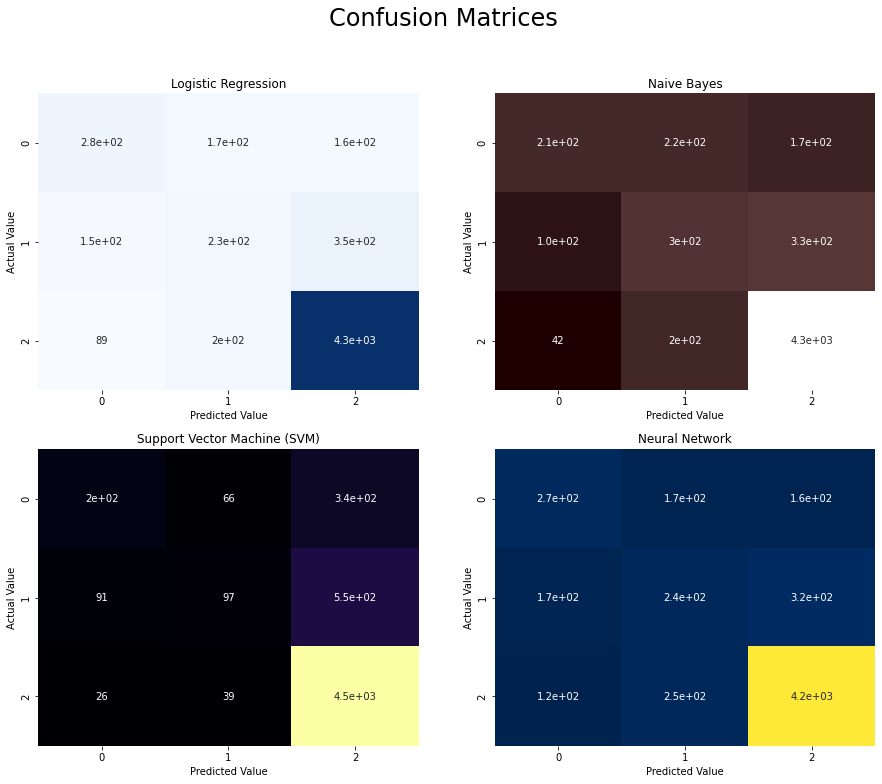

In [42]:
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))
knn_cm=confusion_matrix(y_test.values, neigh.predict(X_test))
dt_cm=confusion_matrix(y_test.values, dt.predict(X_test))
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="pink",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="inferno",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="cividis",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')


Text(570.5454545454544, 0.5, 'Actual Value')

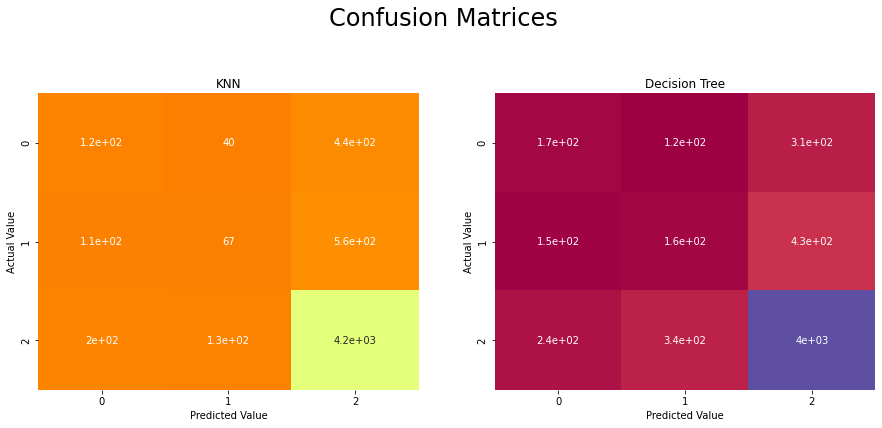

In [43]:
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplot(2,2,1)
plt.title("KNN")
sns.heatmap(knn_cm, annot = True, cmap="Wistia_r",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,2)
plt.title("Decision Tree")
sns.heatmap(dt_cm, annot = True, cmap="Spectral",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [44]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))
print("\n KNN")
print(mt.classification_report(y_test, neigh.predict(X_test)))
print("\n Decision Tree")
print(mt.classification_report(y_test, dt.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

    Negative       0.54      0.47      0.50       603
     Neutral       0.38      0.31      0.35       735
    Positive       0.89      0.94      0.91      4561

    accuracy                           0.81      5899
   macro avg       0.60      0.57      0.59      5899
weighted avg       0.79      0.81      0.80      5899


 Naive Bayes
              precision    recall  f1-score   support

    Negative       0.59      0.35      0.44       603
     Neutral       0.42      0.40      0.41       735
    Positive       0.89      0.95      0.92      4561

    accuracy                           0.82      5899
   macro avg       0.63      0.57      0.59      5899
weighted avg       0.80      0.82      0.81      5899


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

    Negative       0.63      0.33      0.43       603
     Neutral       0.48      0.13      0.21       735
    Positi